<a href="https://colab.research.google.com/github/yongug/Fly_python/blob/main/Day6_ML_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN MNIST**

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0
# 3. 모델 구성
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
# 4. 모델 컴파일

#sparse_categorical_crossentropy/ categorical_crossentropy

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
# 5. 모델 훈련
hist=model.fit(x_train, y_train, epochs=5)
# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2013 - accuracy: 0.9407
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0808 - accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0530 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0362 - accuracy: 0.9889
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9786
테스트 정확도: 0.978600025177002


In [ ]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
#sparse_categorical_crossentropy/categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
hist = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_test, y_test))

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2024 - accuracy: 0.9394 - val_loss: 0.1017 - val_accuracy: 0.9677
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0793 - accuracy: 0.9759 - val_loss: 0.0872 - val_accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0652 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0734 - val_accuracy: 0.9777
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0730 - accuracy: 0.9804
테스트 정확도: 0.980400025844574


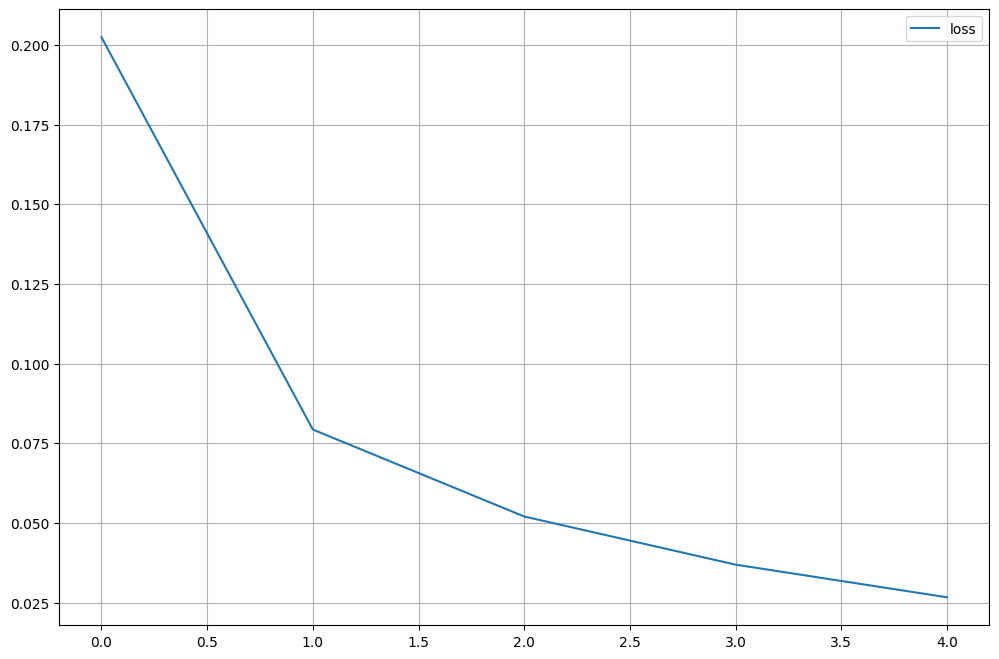

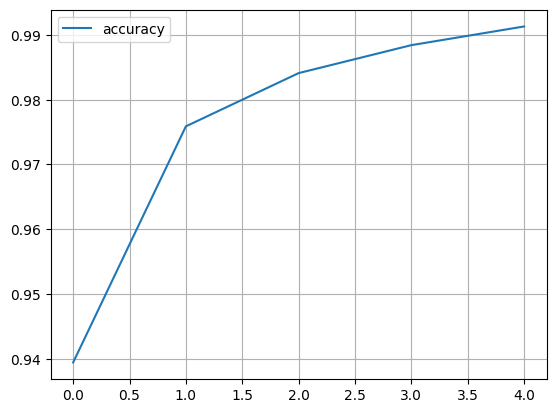

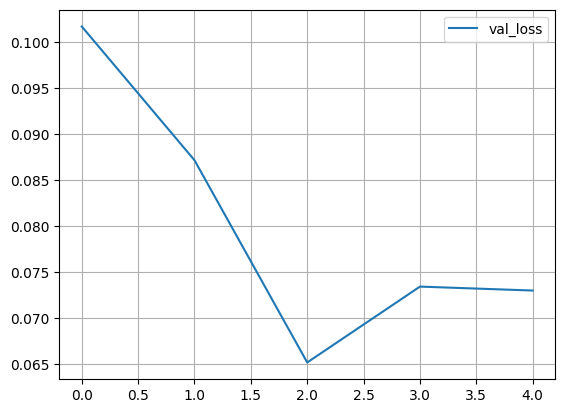

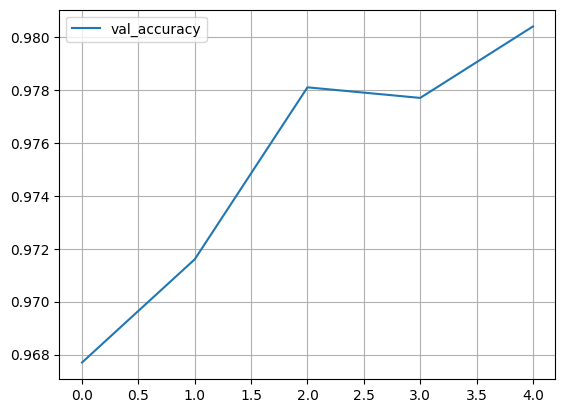

In [ ]:
#7. 그래프로보기
import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
#8. 테스트

score = model.evaluate(x_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9804
Test Loss : 0.07299814373254776
Test Accuracy  : 0.980400025844574


In [ ]:
#9. 데이터 예측

import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
#10. 틀린데이터 수 확인

wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

196

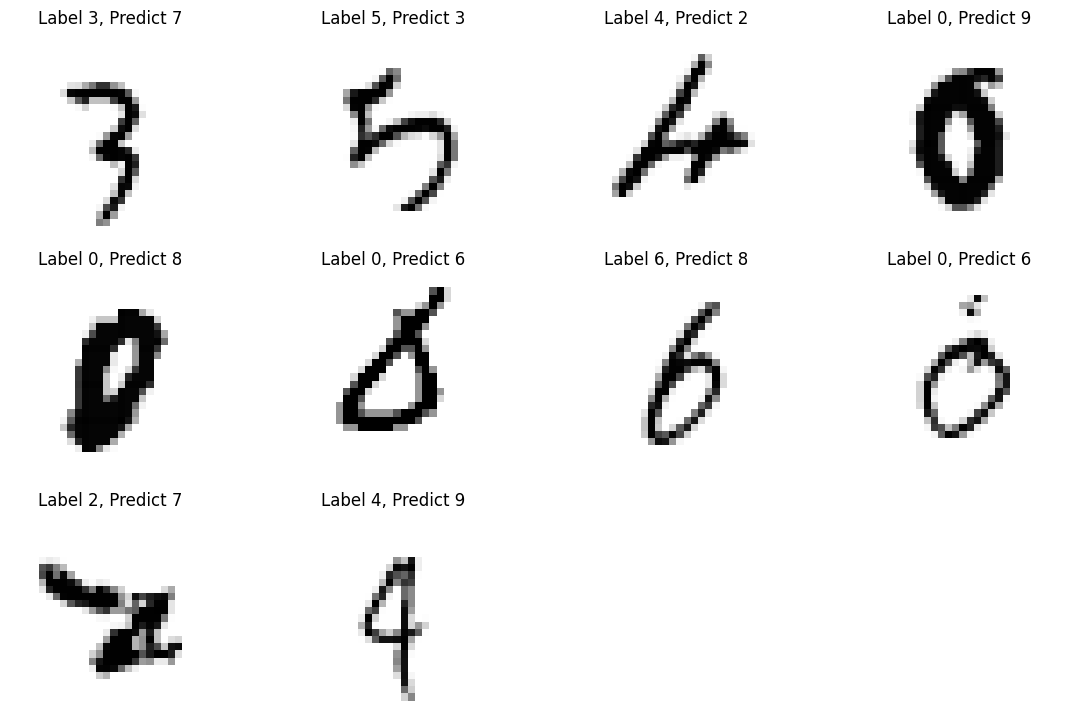

In [ ]:
#11. 틀린데이터 10개 그려보기

import random

samples = random.choices(population=wrong_result, k =10)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [ ]:
# 12. 모델 저장
model.save('MNIST_ANN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **CNN MNIST**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time #모델 컴파일 시간 확인

#1. 데이터 불러오기
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

#2. 모델구성
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5),
                  strides=(1, 1),
                  padding='same',
                  activation='relu',
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

#3. 모델컴파일
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
start_time = time.time()

#4. 모델 훈련
hist = model.fit(X_train, y_train,
                 epochs=5,
                 verbose = 1,
                 validation_data=(X_test, y_test))
print(f'Fit Time :{time.time() - start_time}')

#5. 모델 정확도
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 3136)             

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time #모델 컴파일 시간 확인

#1. 데이터 불러오기
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

#2. 모델구성
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5),
                  strides=(1, 1),
                  padding='same',
                  activation='relu',
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

#3. 모델컴파일
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
start_time = time.time()

#4. 모델 훈련
hist = model.fit(X_train, y_train,
                 epochs=5,
                 verbose = 1,
                 validation_data=(X_test, y_test))
print(f'Fit Time :{time.time() - start_time}')

#5. 모델 정확도
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 1000)             

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time #모델 컴파일 시간 확인

#1. 데이터 불러오기
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

#2. 모델구성
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5),
                  strides=(1, 1),
                  padding='same',
                  activation='relu',
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

#3. 모델컴파일
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
start_time = time.time()

#4. 모델 훈련
hist = model.fit(X_train, y_train,
                 epochs=5,
                 verbose = 1,
                 validation_data=(X_test, y_test))
print(f'Fit Time :{time.time() - start_time}')

#5. 모델 정확도
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_5 (Flatten)         (None, 3136)             

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


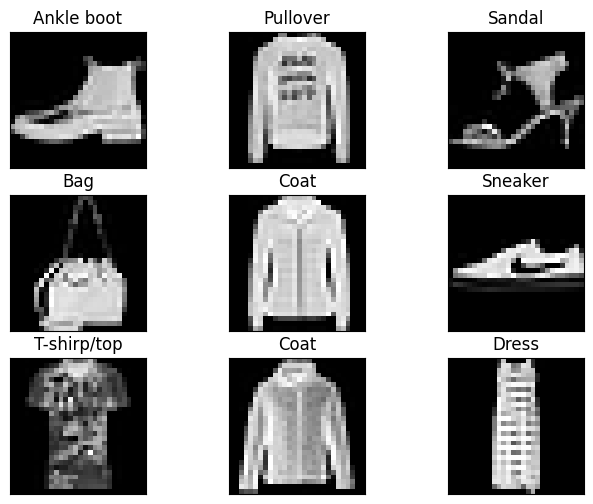

In [ ]:
class_names =['T-shirp/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

samples = np.random.randint(len(X_train), size = 9)

plt.figure(figsize = (8,6))
for i , idx in enumerate(samples):
  plt.subplot(3,3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap ='gray')
  plt.title(class_names[y_train[idx]])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)


(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


In [ ]:
import numpy as np

X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

print(np.max(X_train), np.min(X_train))

1.0 0.0


In [ ]:
X_train = (X_train.reshape((-1,28*28)))
X_val = (X_val.reshape((-1,28*28)))
X_test = (X_test.reshape((-1,28*28)))

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(42000, 784) (42000,)
(18000, 784) (18000,)
(10000, 784) (10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

# 6 모델만들기

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  # model = keras.Sequential()
  # model.add(layers.Flatten(input_shape=(784,)))
  # model.add(layers.Dense(64, activation ='relu',input_shape = (784,)))
  # model.add(layers.Dense(32, input_shape = (784,)))
  # model.add(layers.Dense(10, activation ='softmax'))

  model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

  model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

  return model

In [ ]:

model = build_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
EPOCHS = 100
BATCH_SIZE =64

history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = .2)

Epoch 1/100
525/525 [==============================] - 3s 4ms/step - loss: 0.5887 - acc: 0.7940 - val_loss: 0.4743 - val_acc: 0.8364
Epoch 2/100
525/525 [==============================] - 2s 4ms/step - loss: 0.4227 - acc: 0.8490 - val_loss: 0.4129 - val_acc: 0.8552
Epoch 3/100
525/525 [==============================] - 2s 4ms/step - loss: 0.3877 - acc: 0.8599 - val_loss: 0.3706 - val_acc: 0.8667
Epoch 4/100
525/525 [==============================] - 2s 4ms/step - loss: 0.3542 - acc: 0.8719 - val_loss: 0.3563 - val_acc: 0.8695
Epoch 5/100
525/525 [==============================] - 3s 5ms/step - loss: 0.3348 - acc: 0.8794 - val_loss: 0.3581 - val_acc: 0.8654
Epoch 6/100
525/525 [==============================] - 2s 4ms/step - loss: 0.3228 - acc: 0.8834 - val_loss: 0.3438 - val_acc: 0.8706
Epoch 7/100
525/525 [==============================] - 2s 4ms/step - loss: 0.3086 - acc: 0.8876 - val_loss: 0.3497 - val_acc: 0.8737
Epoch 8/100
525/525 [==============================] - 2s 4ms/step - 

새로운 코드


In [ ]:
# 6 모델만들기
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# 데이터 준비 (예시 데이터 사용)
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

# 데이터 전처리
x_train, x_val = x_train / 255.0, x_val / 255.0

# 모델 빌드 함수
def build_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

model = build_model()
model.summary()

# 콜백 함수 설정
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)
]

# 모델 학습
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=32, callbacks=callbacks)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4984 - accuracy: 0.8241 - val_loss: 0.4189 - val_accuracy: 0.8503 - lr: 0.0010
Epoch 2/20
  60/1875 [..............................] - ETA: 4s - loss: 0.4205 - accuracy: 0.8542

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 6s 3ms/step - loss: 0.3754 - accuracy: 0.8645 - val_loss: 0.3789 - val_accuracy: 0.8628 - lr: 0.0010
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3394 - accuracy: 0.8757 - val_loss: 0.3691 - val_accuracy: 0.8652 - lr: 0.0010
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3142 - accuracy: 0.8842 - val_loss: 0.3568 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2962 - accuracy: 0.8910 - val_loss: 0.3830 - val_accuracy: 0.8678 - lr: 0.0010
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2803 - accuracy: 0.8966 - val_loss: 0.3437 - val_accuracy: 0.8790 - lr: 0.0010
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.9006 - val_loss: 0.3386 - val_accuracy: 0.8792 - lr: 0.0010
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (16,8))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

plt.show()

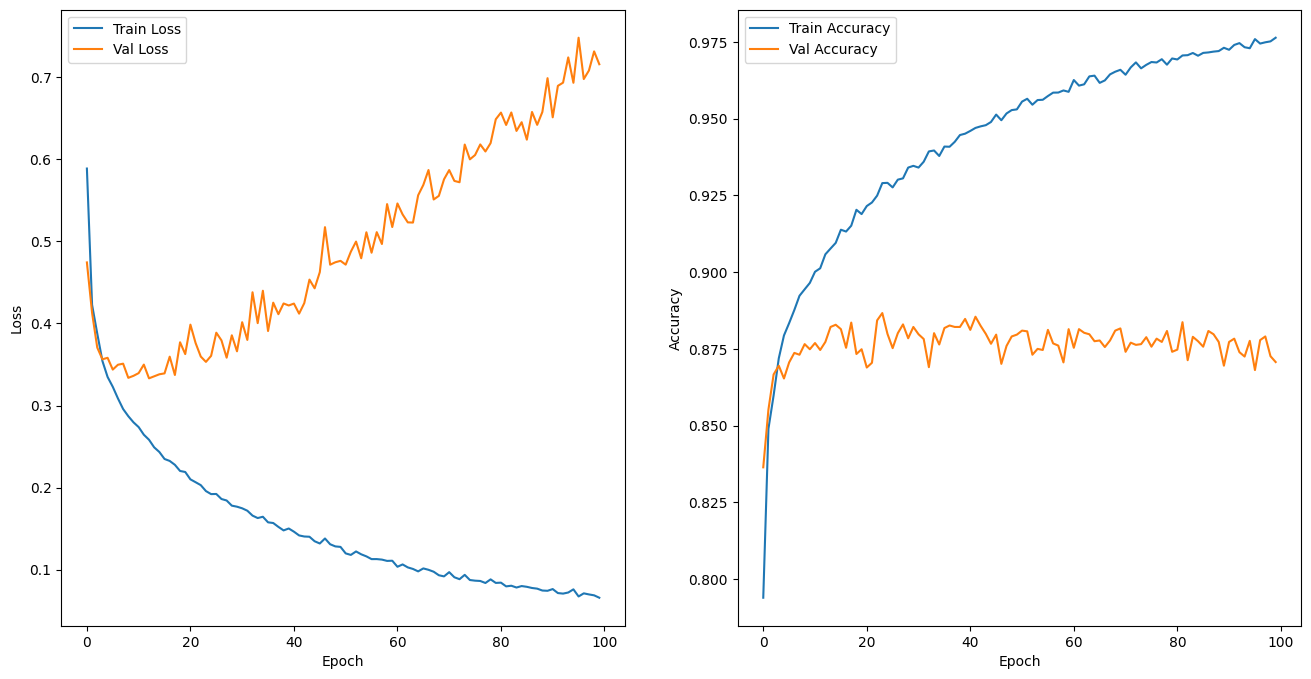

In [ ]:
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (16,8))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

plt.show()

KeyError: 'acc'

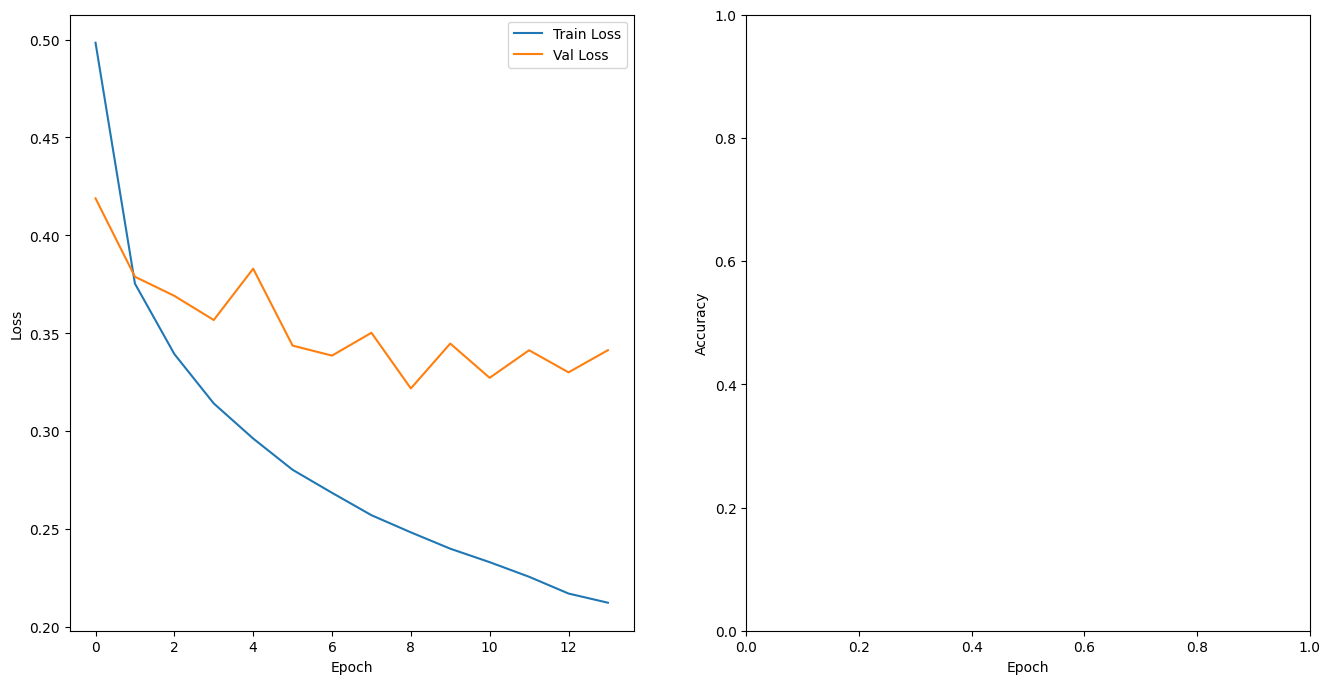

In [ ]:
plot_history(history)

In [ ]:
y_pred = model.predict(X_test)
y_pred[:1]

313/313 [==============================] - 1s 2ms/step


array([[7.6494616e-11, 3.6492351e-18, 1.2433602e-14, 6.7297297e-09,
        9.2796628e-18, 3.9300880e-07, 9.2920842e-13, 2.0903059e-05,
        4.6936490e-20, 9.9997866e-01]], dtype=float32)

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis = 1)
y_pred_argmax[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

<Figure size 1600x600 with 0 Axes>

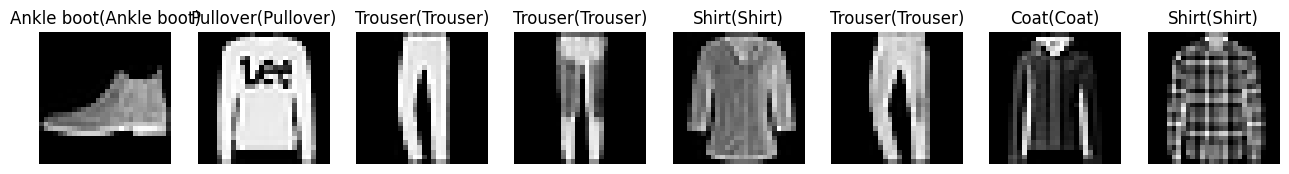

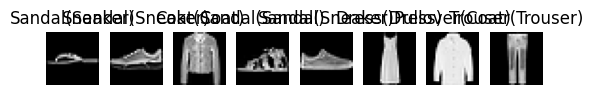

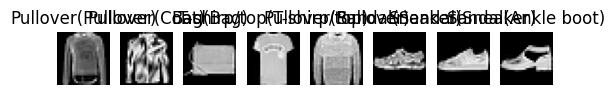

In [ ]:
n_rows = 3
n_cols = 8

plt.figure(figsize = (n_cols *2, n_rows *2))
plt.figure(figsize = (n_cols *2, n_rows *2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_test[index].reshape(28,28), cmap = 'gray')
    #plt.imshow(X_test[index], cmap = 'gray')
    plt.axis('off')
    plt.title(f'{class_names[y_pred_argmax[index]]}({class_names[y_test[index]]})')

  plt.show()

삼각형 / 동그라미 / 네모 구분하기


In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 데이터 경로 설정
train_dir = '/content/shapes'  # 자신의 데이터 경로로 설정

# 이미지 전처리
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [ ]:
# ANN 모델 설계
ann_model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# 모델 컴파일
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
ann_history = ann_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-4-32beca698706>", line 13, in <cell line: 13>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[16,3] labels_size=[16,4]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_924]

In [ ]:
# CNN 모델 설계
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# 모델 컴파일
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
cnn_history = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


In [ ]:
# 학습 결과 시각화
plt.plot(ann_history.history['accuracy'], label='ANN Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='ANN Validation Accuracy')
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Epoch 1/30
8/8 [==============================] - 6s 143ms/step - loss: 1.3245 - accuracy: 0.3500 - val_loss: 1.2932 - val_accuracy: 0.3333
Epoch 2/30
8/8 [==============================] - 1s 75ms/step - loss: 1.1775 - accuracy: 0.2375 - val_loss: 1.1917 - val_accuracy: 0.3333
Epoch 3/30
8/8 [==============================] - 1s 71ms/step - loss: 1.1320 - accuracy: 0.3458 - val_loss: 1.1646 - val_accuracy: 0.3333
Epoch 4/30
8/8 [==============================] - 1s 128ms/step - loss: 1.1250 - accuracy: 0.3333 - val_loss: 1.1859 - val_accuracy: 0.3333
Epoch 5/30
8/8 [==============================] - 1s 117ms/step - loss: 1.1419 - accuracy: 0.3042 - val_loss: 1.1702 - val_accuracy: 0.3333
Epoch 6/30
8/8 [==============================] - 1s 91ms/step - loss: 1.1181 - accuracy: 0.3167 - val_loss: 1.1500 - val_accuracy: 0.3500
Epoch 7/30
8/8 [==============================] - 1s 71ms/step - loss: 1.1155 - ac

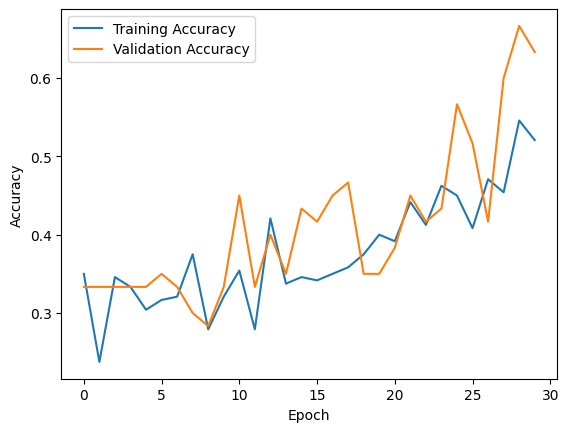

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 데이터 경로 설정
train_dir = '/content/shapes'  # Colab의 데이터 경로로 설정

# 이미지 전처리 및 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 클래스 수 확인
num_classes = len(train_generator.class_indices)

# CNN 모델 설계
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
cnn_history = cnn_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

# 학습 결과 시각화
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Epoch 1/200
8/8 [==============================] - 4s 144ms/step - loss: 1.5245 - accuracy: 0.3208 - val_loss: 1.3398 - val_accuracy: 0.3333
Epoch 2/200
8/8 [==============================] - 1s 65ms/step - loss: 1.1729 - accuracy: 0.3458 - val_loss: 1.1793 - val_accuracy: 0.3333
Epoch 3/200
8/8 [==============================] - 1s 65ms/step - loss: 1.1389 - accuracy: 0.3292 - val_loss: 1.1305 - val_accuracy: 0.3333
Epoch 4/200
8/8 [==============================] - 1s 66ms/step - loss: 1.1147 - accuracy: 0.3375 - val_loss: 1.1504 - val_accuracy: 0.3500
Epoch 5/200
8/8 [==============================] - 1s 65ms/step - loss: 1.1133 - accuracy: 0.3417 - val_loss: 1.1753 - val_accuracy: 0.2667
Epoch 6/200
8/8 [==============================] - 1s 66ms/step - loss: 1.1282 - accuracy: 0.3042 - val_loss: 1.1728 - val_accuracy: 0.2667
Epoch 7/200
8/8 [==============================] - 1s 63ms/step - loss: 1.1152

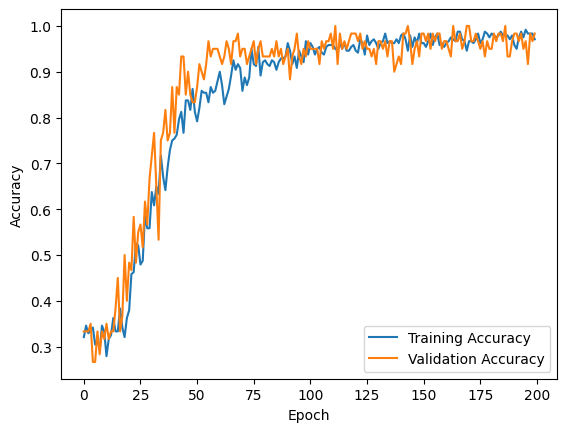

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 데이터 경로 설정
train_dir = '/content/shapes'  # Colab의 데이터 경로로 설정

# 이미지 전처리 및 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='reflect',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

# 트레이닝 데이터와 검증 데이터 생성
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 클래스 수 확인
num_classes = len(train_generator.class_indices)

# CNN 모델 설계
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
cnn_history = cnn_model.fit(
    train_generator,
    epochs=200,
    validation_data=validation_generator
)

# 학습 결과 시각화
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Epoch 1/150
8/8 [==============================] - 3s 80ms/step - loss: 1.5022 - accuracy: 0.2625 - val_loss: 1.3047 - val_accuracy: 0.3333
Epoch 2/150
8/8 [==============================] - 1s 70ms/step - loss: 1.1918 - accuracy: 0.3417 - val_loss: 1.2145 - val_accuracy: 0.3333
Epoch 3/150
8/8 [==============================] - 1s 100ms/step - loss: 1.1181 - accuracy: 0.3500 - val_loss: 1.1179 - val_accuracy: 0.3333
Epoch 4/150
8/8 [==============================] - 1s 107ms/step - loss: 1.1353 - accuracy: 0.3125 - val_loss: 1.1278 - val_accuracy: 0.3333
Epoch 5/150
8/8 [==============================] - 1s 67ms/step - loss: 1.1151 - accuracy: 0.3250 - val_loss: 1.1502 - val_accuracy: 0.3333
Epoch 6/150
8/8 [==============================] - 1s 66ms/step - loss: 1.1115 - accuracy: 0.3458 - val_loss: 1.1519 - val_accuracy: 0.3500
Epoch 7/150
8/8 [==============================] - 1s 68ms/step - loss: 1.124

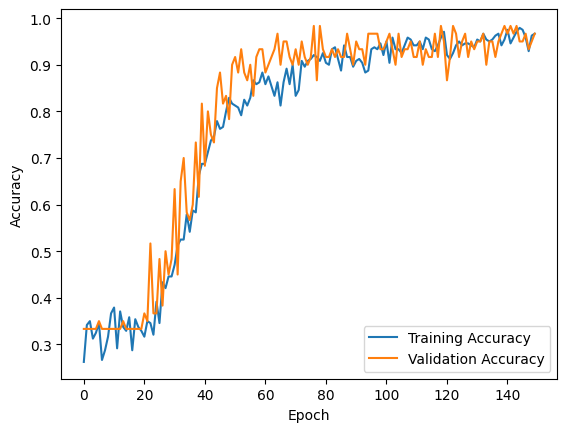

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 데이터 경로 설정
train_dir = '/content/shapes'  # Colab의 데이터 경로로 설정

# 이미지 전처리 및 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='reflect',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

# 트레이닝 데이터와 검증 데이터 생성
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 클래스 수 확인
num_classes = len(train_generator.class_indices)

# CNN 모델 설계
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
cnn_history = cnn_model.fit(
    train_generator,
    epochs=150,
    validation_data=validation_generator
)

# 학습 결과 시각화
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


2/2 [==============================] - 0s 87ms/step


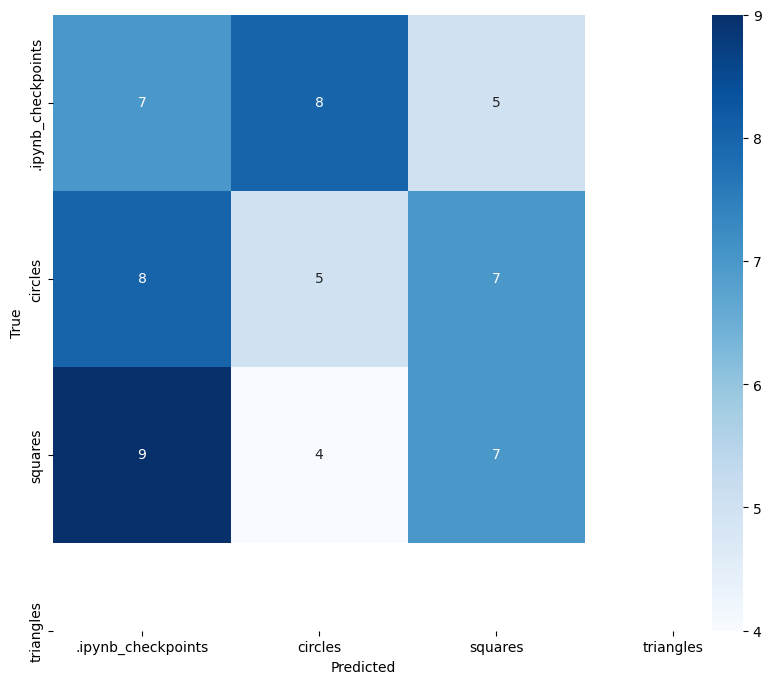

ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 예측 생성
Y_pred = cnn_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# 혼동 행렬 계산
cm = confusion_matrix(y_true, y_pred)
class_names = list(validation_generator.class_indices.keys())

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 분류 보고서 출력
print(classification_report(y_true, y_pred, target_names=class_names))


Number of errors: 41


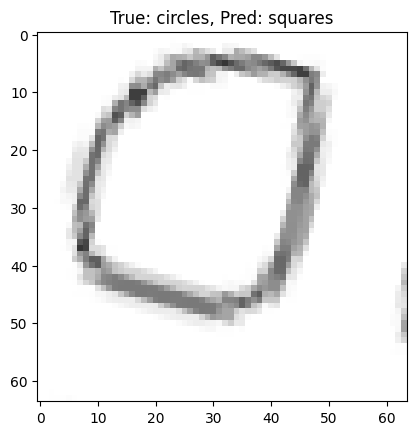

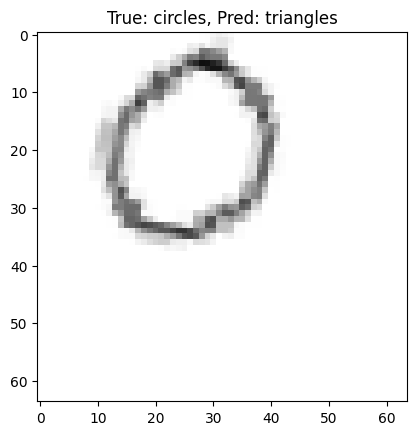

ValueError: Asked to retrieve element 2, but the Sequence has length 2

In [14]:
# 잘못 예측된 샘플 찾기
errors = np.where(y_pred != y_true)[0]

print(f"Number of errors: {len(errors)}")

# 잘못 예측된 샘플 시각화
for i in range(min(10, len(errors))):
    idx = errors[i]
    plt.imshow(validation_generator[idx][0][0])
    plt.title(f"True: {class_names[y_true[idx]]}, Pred: {class_names[y_pred[idx]]}")
    plt.show()
